In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from obspy.core import read, Stream

In [7]:
sw4_path = '/Users/sydneydybing/SW4/strain/'
real_path = '/Users/sydneydybing/StrainProject/2024/'

In [6]:
# Stations

sta_file = 'sw4_strain_stations_metadata.csv'
stas = pd.read_csv(sw4_path + sta_file)
stas

,BNUM,NAME,LAT,LONG,ELEV(m),INSTALL_DATE,CH0(EofN),BSM_Depth(m),SEISMOMETER_Depth(m),PORE_DEPTH(m),...,DATA_END,GAP(m),L_DATE,L0(cnts),L1(cnts),L2(cnts),L3(cnts),REGION,hypo_dist_km,p_arrival
0,B072,goldhl072bcn2007,35.83100,-120.34500,397.7,8/27/07,219.7,159.7,154.5,NaN,...,Present,0.0001,2007:253,47592395,52739856,51898099,51846814,Parkfield_California,248.267863,36.599810
1,B079,jackcn079bcs2006,35.71570,-120.20570,436.6,10/13/06,353.7,181.5,175.1,45.00,...,Present,0.0001,2006:318,48042444,48981765,47787315,49995315,Parkfield_California,235.829519,35.074175
2,B082,pathfi082bcs2006,33.59818,-116.59600,1374.8,6/10/06,324.8,242.6,220.7,22.60,...,Present,0.0002,2006:335,49597819,53081549,47839224,49741765,Anza_California,257.821320,37.771597
3,B087,fordra087bcs2006,33.49550,-116.60267,1139.0,6/17/06,340.7,160.9,147.5,24.38,...,Present,0.0002,2006:335,49940592,51287823,50044783,49977525,Anza_California,268.302260,39.057145
4,B916,marips916bcs2008,36.19250,-117.66850,1859.9,3/13/08,303.6,176.5,166.9,NaN,...,Present,0.0001,2008:090,55948375,53191200,55522127,49391430,Mojave_California,47.348199,8.224188
5,B917,tonyso917bcs2008,35.38920,-117.25870,1125.9,7/14/08,306.1,162.5,Unknown,NaN,...,Present,0.0001,2008:219,51200216,53318503,50164819,49964400,Mojave_California,52.284362,9.024224
6,B918,mtsprn918bcs2008,35.93570,-117.60170,1042.6,6/21/08,288.9,196.7,189.9,NaN,...,Present,0.0001,2008:245,56324863,55262353,53608304,55388642,Mojave_California,18.442171,3.584549
7,B921,randsb921bcs2008,35.58650,-117.46220,694.5,6/3/08,340.5,147.4,139.9,NaN,...,Present,0.0001,2008:178,53324139,53302937,55141972,53475662,Mojave_California,23.798922,4.428801


In [55]:
test_stas = stas.iloc[[4]]
test_stas

,BNUM,NAME,LAT,LONG,ELEV(m),INSTALL_DATE,CH0(EofN),BSM_Depth(m),SEISMOMETER_Depth(m),PORE_DEPTH(m),...,DATA_END,GAP(m),L_DATE,L0(cnts),L1(cnts),L2(cnts),L3(cnts),REGION,hypo_dist_km,p_arrival
4,B916,marips916bcs2008,36.1925,-117.6685,1859.9,3/13/08,303.6,176.5,166.9,NaN,...,Present,0.0001,2008:090,55948375,53191200,55522127,49391430,Mojave_California,47.348199,8.224188


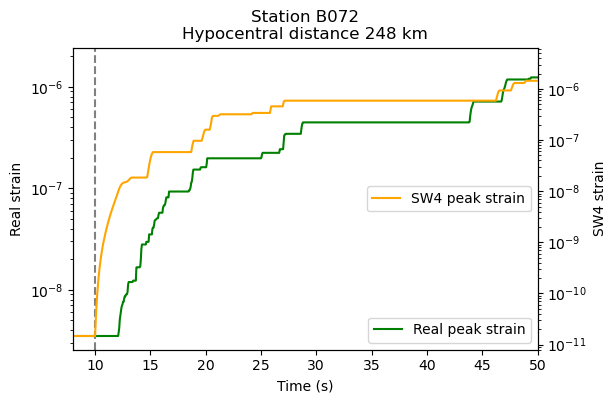

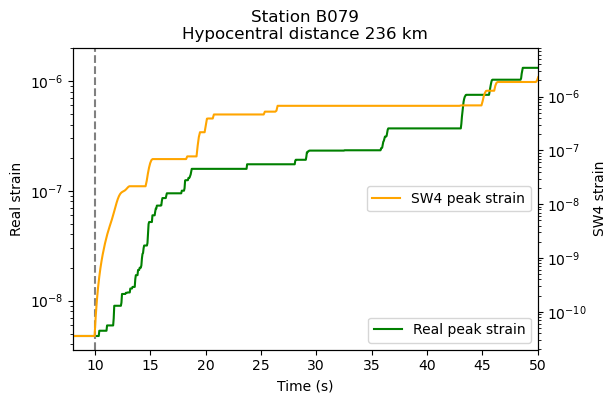

No real data for station B082
No real data for station B087


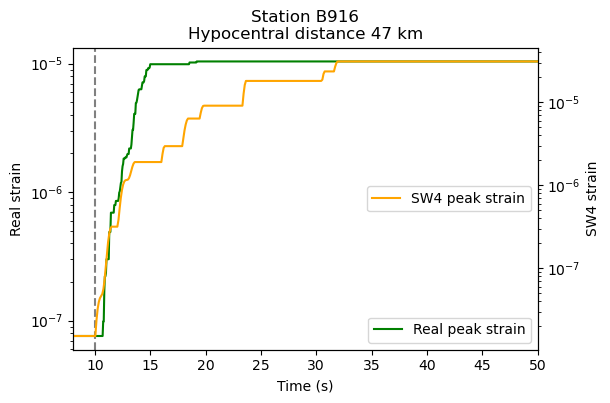

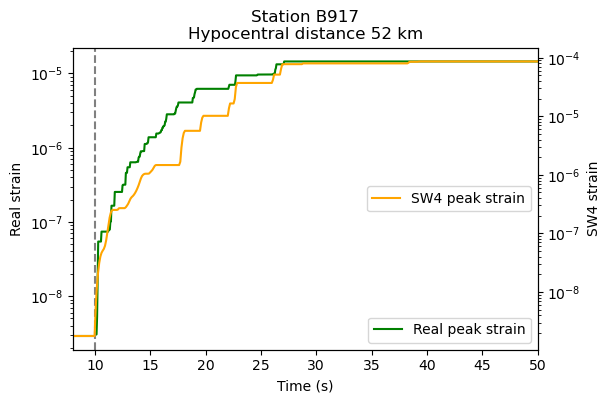

No real data for station B918


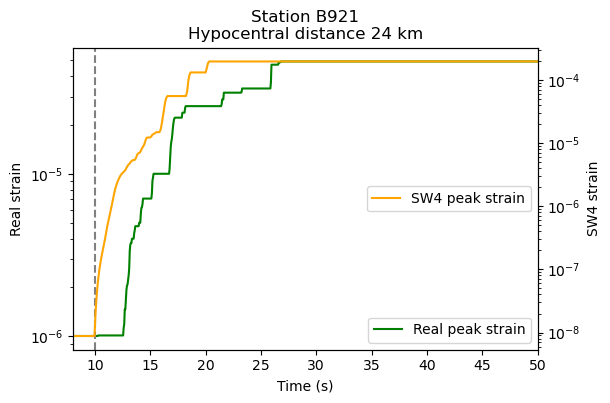

In [67]:
for idx in range(len(stas)):
    
    sta = stas.BNUM.values[idx]
    theo_p_arr = stas.p_arrival.values[idx] # Seconds after origin time of earthquake
    hypo_dist = stas.hypo_dist_km.values[idx]
    
    sw4_rms_strain = np.load(sw4_path + 'rms_and_peak_sw4_data/strain/rms/' + sta + '.npy')
    sw4_peak_strain = np.load(sw4_path + 'rms_and_peak_sw4_data/strain/peak/' + sta + '.npy')
    
    try:
        real_rms_strain = read(real_path + 'strain_data/rms/2019-07-06_M7.1/' + sta + '.mseed')
        real_peak_strain = read(real_path + 'strain_data/peak_post_p/2019-07-06_M7.1/' + sta + '.mseed')
        # real_rms_strain.plot()
        # real_peak_strain.plot()
    except:
        print('No real data for station ' + sta)
        continue
    
    # RMS data both start at the earthquake origin time
    
    sw4_rms_strain_times = sw4_rms_strain[:,0]
    sw4_rms_strain_data = sw4_rms_strain[:,1]
    
    real_rms_strain_times = real_rms_strain[0].times()
    real_rms_strain_data = real_rms_strain[0].data
    
    sw4_peak_strain_times = sw4_peak_strain[:,0]
    sw4_peak_strain_data = sw4_peak_strain[:,1]
    
    real_peak_strain_times = real_peak_strain[0].times() # This has been shifted so that the P-wave arrival is at 10 seconds
    real_peak_strain_data = real_peak_strain[0].data
    
    # Shift the SW4 peak strain so that it lines up with the real peak strain, which has the P-wave arrival at 10 seconds
    
    if theo_p_arr >= 10: # Shift the peak strain backward
        shift_amount = theo_p_arr - 10
        sw4_peak_strain_times = sw4_peak_strain_times - shift_amount
    else: # Shift the peak strain forward
        shift_amount = 10 - theo_p_arr
        sw4_peak_strain_times = sw4_peak_strain_times + shift_amount
    
    plot_peak = True
    show_or_save = 'show'
    
    if show_or_save == 'show':
        dpi = 100
    else:
        dpi = 400
    
    fig = plt.figure(dpi = dpi)
    ax = fig.add_subplot(111)
    ax.set_title('Station ' + str(sta) + '\nHypocentral distance ' + str(round(hypo_dist)) + ' km')
    
    if plot_peak:
        ax.plot(real_peak_strain_times, real_peak_strain_data, color = 'green', label = 'Real peak strain')
        ax.semilogy()
        
    else:
        ax.plot(real_rms_strain_times, real_rms_strain_data, color = 'red', label = 'Real RMS strain')
        # tol = 0.05
        # # Finds the index where the strain timeseries equals the low and high x limits you want
        # # Want the low y limit to be smaller than the minimum of the timeseries between the low and high xlims
        # # And the high y limit to be bigger than the maximum of the timeseries between the low and high xlims
        # ax_ylow_i = np.where(np.abs(time_strain - xlim_low) <= tol)[0][0]
        # ax_yhigh_i = np.where(np.abs(time_strain - xlim_high) <= tol)[0][0]
        # ax_ylim_low = np.min(rms_strain[ax_ylow_i:ax_yhigh_i]) * 0.9
        # ax_ylim_high = np.max(rms_strain[ax_ylow_i:ax_yhigh_i]) * 1.1
        # ax.set_ylim(ax_ylim_low, ax_ylim_high)
    
    ax2 = ax.twinx()
    
    if plot_peak:
        ax2.plot(sw4_peak_strain_times, sw4_peak_strain_data, color = 'orange', label = 'SW4 peak strain')
        ax2.semilogy()
    else:
        ax2.plot(sw4_rms_strain_times, sw4_rms_strain_data, color = 'blue', label = 'SW4 RMS strain')
        # ax2_ylow_i = np.where(np.abs(time_gnss - xlim_low) <= tol)[0][0]
        # ax2_yhigh_i = np.where(np.abs(time_gnss - xlim_high) <= tol)[0][0]
        # ax2_ylim_low = np.min(rms_gnss[ax2_ylow_i:ax2_yhigh_i]) * 0.9
        # ax2_ylim_high = np.max(rms_gnss[ax2_ylow_i:ax2_yhigh_i]) * 1.1
        # ax2.set_ylim(ax2_ylim_low, ax2_ylim_high)
    
    if plot_peak:
        ax.axvline(10, color = 'gray', linestyle = '--')
    else:
        ax.axvline(theo_p_arr, color = 'gray', linestyle = '--')
    # ax.set_xlim(xlim_low, xlim_high)
    ax.set_xlim(8, 50)
    ax.legend(loc = 'lower right')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Real strain')
    
    ax2.legend(loc = 'center right')
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('SW4 strain')
    
    if show_or_save == 'show':
        plt.show()
    else:
        print('Saving ' + str(sta) + ' figure')
        if plot_peak:
            folder = 'peak'
        else:
            folder = 'rms'
        plt.savefig(path + 'rms_and_peak_sw4_vs_real_figs/' + folder + '/' + sta + '.png', format = 'PNG')
        plt.close()

In [35]:
len(np.arange(0, num_of_idxs_to_cut, 1))

254